# 3.3 例子3 结果可视化
## matplotlib 可视化

In [1]:
from __future__ import print_function
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


#### 定义函数

In [2]:
def add_layer(inputs, in_size, out_size, activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

#### Make up some real data

In [3]:
x_data = np.linspace(-1, 1, 300)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape)
y_data = np.square(x_data) - 0.5 + noise

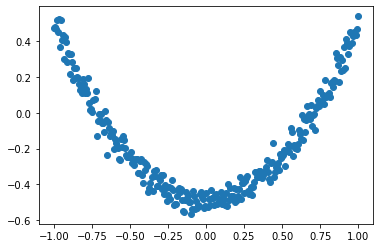

In [4]:
plt.scatter(x_data, y_data)
plt.show()

#### define placeholder for inputs to network

In [5]:
xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])

#### add hidden layer

In [6]:
l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)

#### add output layer

In [7]:
prediction = add_layer(l1, 10, 1, activation_function=None)

#### the error between prediction and real data

In [8]:
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys-prediction), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

#### important step

In [9]:
sess = tf.Session()
# tf.initialize_all_variables() no long valid from
# 2017-03-02 if using tensorflow >= 0.12
if int((tf.__version__).split('.')[1]) < 12 and int((tf.__version__).split('.')[0]) < 1:
    init = tf.initialize_all_variables()
else:
    init = tf.global_variables_initializer()
sess.run(init)

构建图形，用散点图描述真实数据之间的关系。 （注意：plt.ion()用于连续显示。）
散点图的结果为：

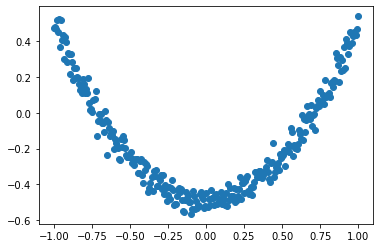

In [10]:
# plot the real data
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data, y_data)
plt.ion()
plt.show()

接下来，我们来显示预测数据。
每隔50次训练刷新一次图形，用红色、宽度为5的线来显示我们的预测数据和输入之间的关系，并暂停0.1s。

In [11]:
for i in range(1000):
    # training
    sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
    if i % 50 == 0:
        # to visualize the result and improvement
        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass
        prediction_value = sess.run(prediction, feed_dict={xs: x_data})
        # plot the prediction
        lines = ax.plot(x_data, prediction_value, 'r-', lw=5)
        plt.pause(1)

# 3.4 加速神经网络训练 (Speed Up Training)

# 3.5 优化器 optimizer